In [1]:
%load_ext autoreload
%autoreload 2

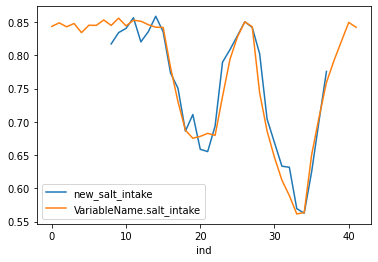

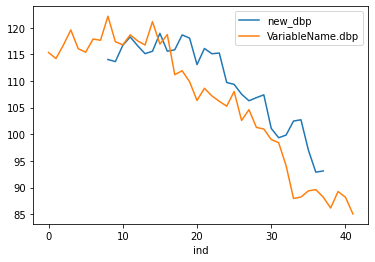

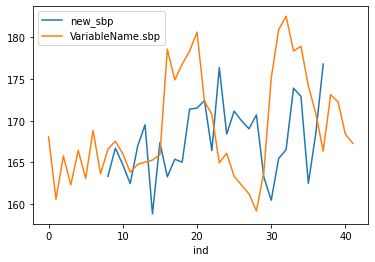

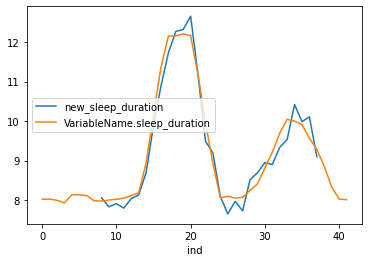

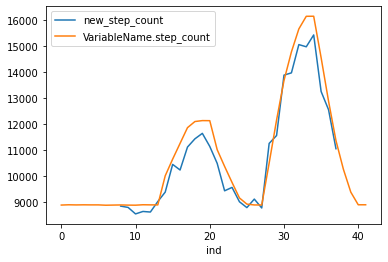

In [4]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
pd.options.mode.chained_assignment = None
df = pd.read_csv("../misc/output_mae_reducedlr_all_uat.csv")
df.sort_values('time', inplace=True, ignore_index=True)
variable_list = ['salt_intake', 'dbp','sbp', 'sleep_duration', 'step_count'] 
for var in variable_list:
    df['new_' + var] = np.NaN
context_window = 8
forecast_horizon_num = 1
for user_id, df_temp2 in df.groupby('user_id'):
    df_temp = df_temp2.copy()
    for var in variable_list:
        df_temp['new_' + var].iloc[(context_window-1+forecast_horizon_num):] = df_temp['VariableName.' + var + '_horizon_'+str(forecast_horizon_num)+'_predict'].iloc[:-(context_window-1+forecast_horizon_num)]
        df_temp['ind'] = np.array(list(range(df_temp.shape[0])))
        df_temp[['ind', 'new_' + var, 'VariableName.' + var]].plot(x='ind')
    break